# Lab8 机器学习

本笔记本是练习机器学习的基本操作。

## K-Nearest Neighbor 最近邻
以下是使用 KNN 和交叉验证对虹膜数据集进行分类的示例。 我们采用 sklearn 中的两个函数来完成分类任务。

[sklearn.neighbors.KNeighborsClassifier()](https://scikit-learn.org/stable/modules/ generated/sklearn.neighbors.KNeighborsClassifier.html)是k近邻分类方法。 其重要参数有：
- n_neighbors（默认=5）：默认情况下用于分类投票的邻居数量。
- 权重（默认='uniform'）：预测中使用的权重函数（uniform：每个邻域中的所有点均等加权）。
- metric（默认='minkowski'）：距离度量
- p：Minkowski 度量的幂参数（p=1:manhattan_distance；p=2:euclidean_distance）

<div align="center">
    <img src="img/dist-metrics.png" width="60%">
</div>


### 交叉验证
下图提醒您交叉验证是如何工作的：

<div align="center">
	<img src="img/k-cv.png" width="70%">
</div>

[sklearn.model_selection.cross_val_score()](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)，用于通过交叉验证评估分数。 其重要参数有：
- 估计器：用于拟合数据的对象，即您的模型。
- x：拟合数据，即特征。
- y：在监督学习的情况下尝试预测的目标。
- 组（默认=无）：折叠数
- 评分（默认=无，如果无，则使用估计器的默认评分器（如果可用）。用于评估的评分指标。

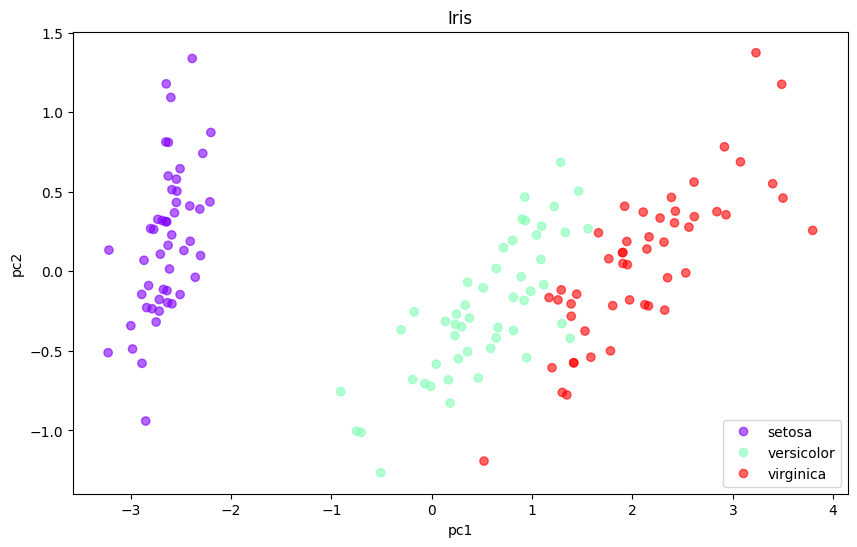

----------------------------------
The best k for KNN is : 3


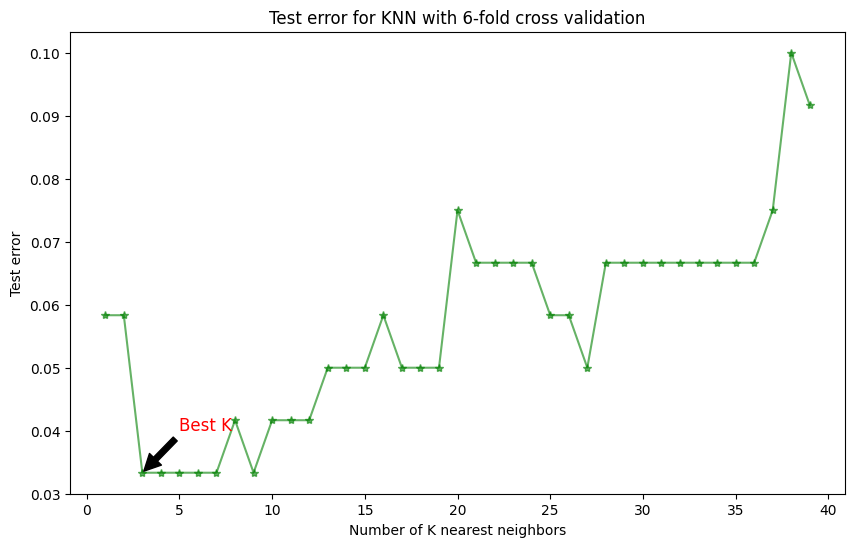

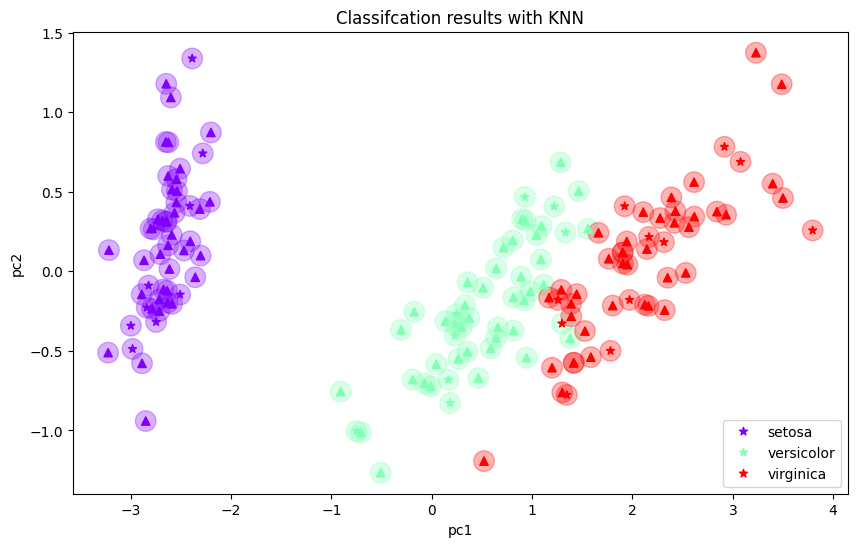

In [ ]:
#  KNN for iris data set with cross validation
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# return_X_y=True 表示函数将返回两个值：特征矩阵和标签向量。     
feature, flowerC = load_iris(return_X_y=True)
# scaler = StandardScaler()
# print(feature[40:60])
# print(flowerC[40:60])

### -------------------------------- Data reduction --------------------------------

# 使用PCA（主成分分析）将原始的4维特征降到2维，以便于可视化。
pca = PCA(n_components=2)
'''这个方法结合了 fit 和 transform 两个步骤。它首先在输入数据 X 上拟合 PCA 模型，然后对数据进行降维。
fit(X): 计算数据的均值和协方差矩阵，并找到主成分。
transform(X): 将数据投影到主成分上，得到降维后的数据。  '''
feature_reduced = pca.fit_transform(feature)
# print(feature_reduced)
# print("奇异值:", pca.singular_values_)
'''解释方差的比例取值范围在0到1之间，值越接近1，表示模型解释的数据变异性越多，拟合效果越好。
相反，值越接近0，表示模型几乎没有解释数据中的变异性，拟合效果较差。'''
# print("解释方差的比例:", pca.explained_variance_ratio_)

#  通过散点图展示降维后的数据，不同类别用不同颜色表示。
plt.figure(figsize=(10, 6))
labels=['setosa', 'versicolor', 'virginica']
# cmap 参数指定了颜色映射（colormap）。'rainbow' 是一种颜色渐变，从红到紫。
s = plt.scatter(feature_reduced[:, 0], feature_reduced[:, 1], c=flowerC, marker='o', cmap='rainbow', alpha = 0.6)
plt.xlabel('pc1')
plt.ylabel('pc2')
'''legend_elements() 是一些绘图对象（如散点图、线图等）的方法，
它返回一个元组，其中第一个元素是图例句柄（legend handles），第二个元素是标签（labels）。
[0] 表示我们只取这个元组的第一个元素，即图例句柄。'''
plt.legend(handles = s.legend_elements()[0], labels=labels)
plt.title('Iris')
plt.show()

### ---------------------------- 划分训练集和测试集 ----------------------
#test_size=0.2: 表示我们希望将 20% 的数据用作测试集，其余 80% 的数据用作训练集。
test_size = 0.2
'''使用 train_test_split 函数来划分数据集。
这个函数会随机地将数据分成训练集和测试集，并返回四个数组：训练特征、测试特征、训练标签和测试标签。
feature_reduced: 这是降维后的特征矩阵。
flowerC: 这是原始数据的标签向量。
test_size=0.2: 指定测试集的比例为 20%。
random_state=3: 设置随机种子，以确保每次运行代码时得到相同的划分结果。 这在调试和比较不同模型时非常有用。 '''
train_feature,test_feature, train_flowerC, test_flowerC = train_test_split(feature_reduced, flowerC,test_size=test_size,random_state=3)

### ------------------------------ 寻找最佳K值 --------------------------


# K: 表示我们将尝试的最大邻居数（不包括）。在这个例子中，我们将尝试从 1 到 39 的邻居数。
K = 40
#cv: 交叉验证的折数。
cv = 8
# k_range: 一个范围对象，包含从 1 到 39 的所有整数。
k_range = range(1, K)
# k_error: 一个空列表，用于存储每个 k 值对应的错误率。
k_error = []


for k in k_range:
    # 这里我们创建了一个 KNN 模型实例，其中 n_neighbors=k 指定了当前使用的邻居数为 k。
    knn = KNN(n_neighbors=k)
    # 使用 cross_val_score 函数对 KNN 模型进行交叉验证。这个函数会将数据集分成 cv(8) 个部分，并多次训练和测试模型，以获得更准确的性能评估。scoring='accuracy' 表示我们使用准确率作为评分标准 
    scores = cross_val_score(knn, train_feature, train_flowerC, cv=cv, scoring='accuracy')
#   计算错误率并存储
    k_error.append(1- scores.mean())
#   print('Test error for k =' + str(k) + ':', 1 - scores.mean())

# 找到具有最小错误率的 k 值. 由于 k_range 是从 1 开始的，所以我们需要加 1 来得到实际的 k 值。
k_best = k_error.index(min(k_error))+1
print ('----------------------------------')
print ('The best k for KNN is :', k_best)

#   ------------------------------  绘制K值与错误率的关系图，并标注出最佳的K值。 --------------------------
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_error, 'g*-', alpha = 0.6)
plt.annotate('Best K', xy=(k_best, min(k_error)), xytext=(k_best+2, min(k_error)*1.2), fontsize= 12, color= 'red', arrowprops=dict(color='black', shrink=0.04))
plt.title('Test error for KNN with 6-fold cross validation')
plt.xlabel('Number of K nearest neighbors')
plt.ylabel('Test error')
plt.show()

### ------------------------ 使用最佳K值训练KNN并进行预测 ---------------------------------


#使用之前找到的最佳 k 值来初始化一个新的 KNN 模型：
best_knn = KNN(n_neighbors=k_best) 
#fit 方法是用于训练机器学习模型的方法。在这里，我们将训练特征矩阵 train_feature 和对应的标签向量 train_flowerC 传递给 fit 方法，以训练 KNN 模型。
best_knn.fit(train_feature, train_flowerC)
test_predictC = best_knn.predict(test_feature)   #predict 方法是用于对新数据进行预测的方法。
# print（best_knn.predict_proba（test_feature）） # 预测概率


# 通过散点图展示训练集、测试集以及预测结果
plt.figure(figsize=(10, 6))
labels=['setosa', 'versicolor', 'virginica']
s = plt.scatter(feature_reduced[:, 0], feature_reduced[:, 1], c=flowerC, s=220, marker='o', cmap='rainbow', alpha = 0.3)
s = plt.scatter(train_feature[:, 0], train_feature[:, 1], c=train_flowerC, marker='^', cmap='rainbow', alpha = 1)
s = plt.scatter(test_feature[:, 0], test_feature[:, 1], c=test_predictC, marker='*', cmap='rainbow', alpha = 1)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(handles = s.legend_elements()[0], labels=labels)
plt.title('Classifcation results with KNN')
plt.show()

### 混淆矩阵
我们可以使用函数 [sklearn.metrics.confusion_matrix(y_true, y_pred)](https://scikit-learn.org/stable/modules/ generated/sklearn.metrics.confusion_matrix.html? 突出显示=混乱#sklearn.metrics.confusion_matrix）：
- y_true：真实（正确）目标值。
- y_pred：分类器返回的估计目标。

In [2]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_flowerC, test_predictC)
print(best_knn.score(test_feature, test_flowerC)) # knn.score(),计算准确率的函数

0.9666666666666667


### 评估指标

基于混淆矩阵，您还可以计算测试数据的精度/召回率/F1 分数：
- [sklearn.metrics. precision_score(y_true, y_pred,average=None)](https://scikit-learn.org/stable/modules/ generated/sklearn.metrics. precision_score.html)
- [sklearn.metrics.recall_score(y_true, y_pred,average=None)](https://scikit-learn.org/stable/modules/ generated/sklearn.metrics.recall_score.html?highlight=recall#sklearn.metrics。 召回分数）
- [sklearn.metrics.f1_score(y_true, y_pred,average=None)](https://scikit-learn.org/stable/modules/ generated/sklearn.metrics.f1_score.html)
     * y_true：测试集的基本事实
     * y_pred：测试集的预测结果
     * 平均值（默认=二进制）：多类/多标签目标需要此参数。 其他选择：
         - “二元”，当他的目标 (y_{true,pred}) 是二元时；
         - 当您要求每门课程的分数时，无；
         - 当您需要每门课程的平均分数时使用“宏观”。

准确度也可以通过 [sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True)](https://scikit-learn.org/stable/modules/ generated/sklearn.metrics.accuracy_score.html#sklearn.metrics 来计算 .accuracy_score):
* y_true：测试集的基本事实
* y_pred：测试集的预测结果
* 标准化（默认=True）：
     * False：返回正确分类的样本数。
     * True：返回正确分类样本的比例。

### 任务 1
试着阅读并理解上面的代码，现在我们处理一个新的数据集 [dry_bean](https://www.kaggle.com/tomabraham3233/dry-beans-datasetcsv)。你们的任务是

- 加载数据 
    - dry_bean_train.csv*（用作包含特征和相应类别的训练集）、 
    - *dry_bean_test.csv*（用作测试集，只有特征）、 
    - 数据文件夹中的 *dry_bean_target.csv*（用作包含目标类别的测试集的基本事实）。
- 对特征进行 "标准化 "处理。
- 通过 "PCA "降低特征维度，并使用第一 PC 和第二 PC 对训练集进行 "可视化"。
- 使用训练集 "训练 KNN "模型，找出最佳 K，并 "绘制误差 "线以直观显示最佳 K 的选择。
- 使用训练好的 KNN 为测试集 "预测类别标签"，并 "可视化 "预测结果和测试类别。
- 为结果构建 "混淆矩阵
- 通过精确度、召回率和 f1 分数来评估结果。

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns



In [8]:
target_data = pd.read_csv('../data/dry_bean_target.csv')
test_data = pd.read_csv('../data/dry_bean_test.csv')
train_data = pd.read_csv('../data/dry_bean_train.csv')

In [9]:
# 提取特征和标签
X_train = train_data.iloc[:, :-1].values  # 训练集特征（前15列）
y_train = train_data.iloc[:, -1].values   # 训练集标签（最后1列）

X_test = test_data.values  # 测试集特征（无标签）

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


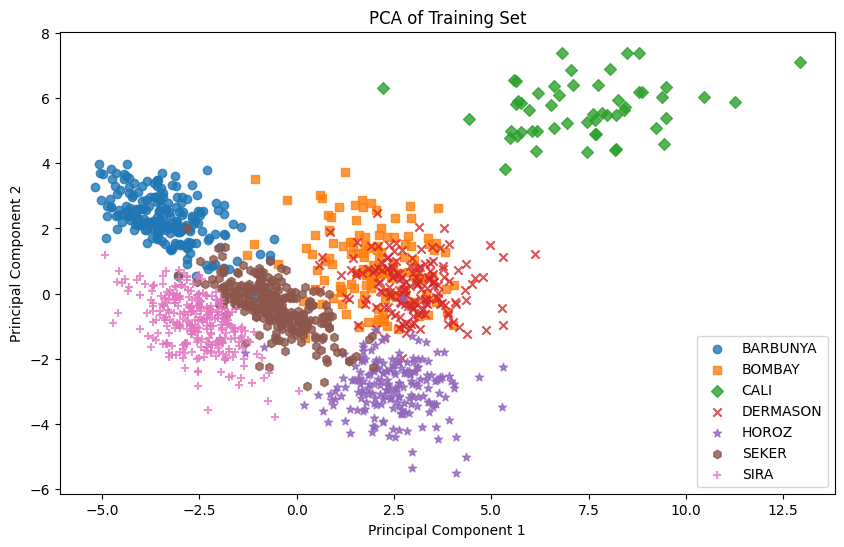

In [16]:
# PCA 降维至2个主成分
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_scaled)

# 可视化前两个主成分
plt.figure(figsize=(10, 6))
marker=['o','s','D','x','*','h','+']
labels=['BARBUNYA', 'BOMBAY', 'CALI','DERMASON','HOROZ','SEKER','SIRA']

# 获取类别标签，其中pd.factorize(y_train)[0] 是用于将类别标签（通常是字符串）转换为整数编码的操作
encoded_labels = pd.factorize(y_train)[0]

# 绘制每个类别的数据点
for i in range(len(marker)):
    # 选择当前类别的样本
    current_class = i
    current_mask = encoded_labels == current_class
    
    # 绘制散点图，指定当前类别的标记样式
    plt.scatter(X_train_pca[current_mask, 0], X_train_pca[current_mask, 1], 
                marker=marker[i], label=labels[i], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training Set')
#plt.legend(handles = s.legend_elements()[0], labels=labels)
plt.legend()
plt.show()


In [ ]:
#划分训练集和数据集
#train_feature,test_feature, train_flowerC, test_flowerC = train_test_split(X_train_pca, y_train,test_size=0.2,random_state=3)

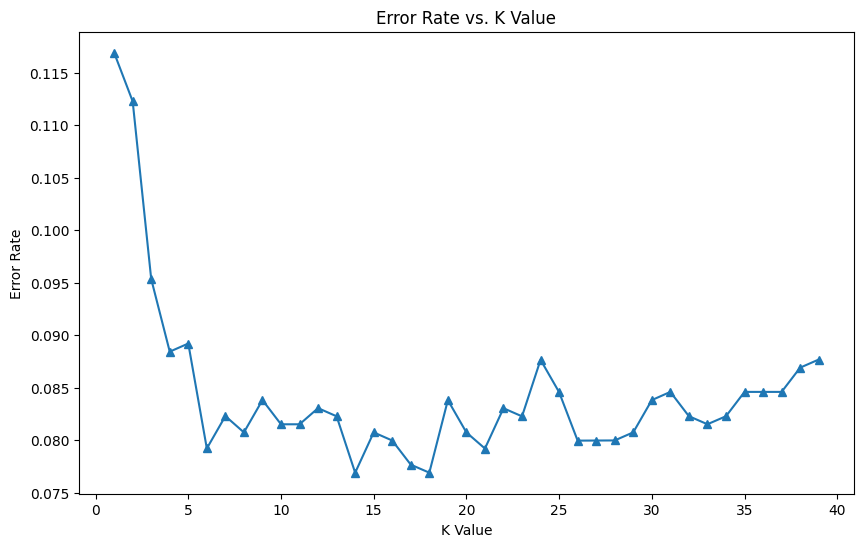

The best k for KNN is : 14


In [22]:
# 绘制误差曲线，选择最佳 K

error_rates = []
k_range = range(1, 40)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train_scaled, y_train, cv=8, scoring='accuracy')
    #y_pred = knn.predict(X_train_scaled)
    #error_rate = np.mean(y_pred != y_train)
    error_rates.append(1 - scores.mean())

# 绘制 K 值与误差率关系的图
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, marker='^')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

# 最佳 K 值选择为误差率最小的 K
best_k = error_rates.index(min(error_rates))+1
print(f'The best k for KNN is : {best_k}')


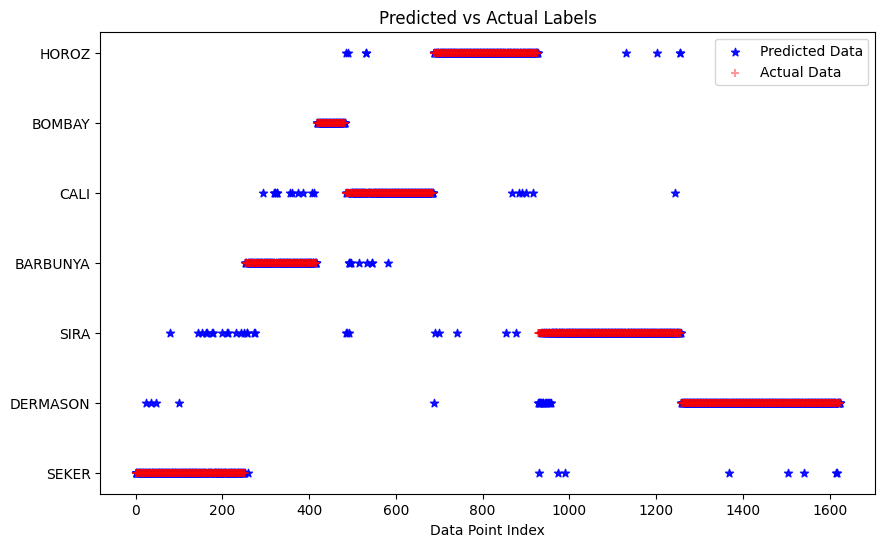

In [14]:

# 使用最佳 K 值训练 KNN 模型
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# 预测测试集的类别标签
y_test_pred = knn.predict(X_test_scaled)

# 可视化预测结果
plt.figure(figsize=(10, 6))
# 将预测标签绘制为蓝色散点
plt.scatter(np.arange(len(y_test_pred)), y_test_pred, label='Predicted Data', alpha=0.9, color='blue', marker='*')
# 将实际标签绘制为红色散点,target_data.values.flatten()：这将实际的标签数据转换为一维数组，以便能够正确绘制散点图。
plt.scatter(np.arange(len(target_data)), target_data.values.flatten(), label='Actual Data', alpha=0.4, color='red', marker='+')
#s = plt.scatter(feature_reduced[:, 0], feature_reduced[:, 1], c=flowerC, s=220, marker='+', cmap='rainbow', alpha = 0.5)
# 添加标题和标签
plt.title('Predicted vs Actual Labels')
plt.xlabel('Data Point Index')
# 添加图例
plt.legend()
# 显示图形
plt.show()


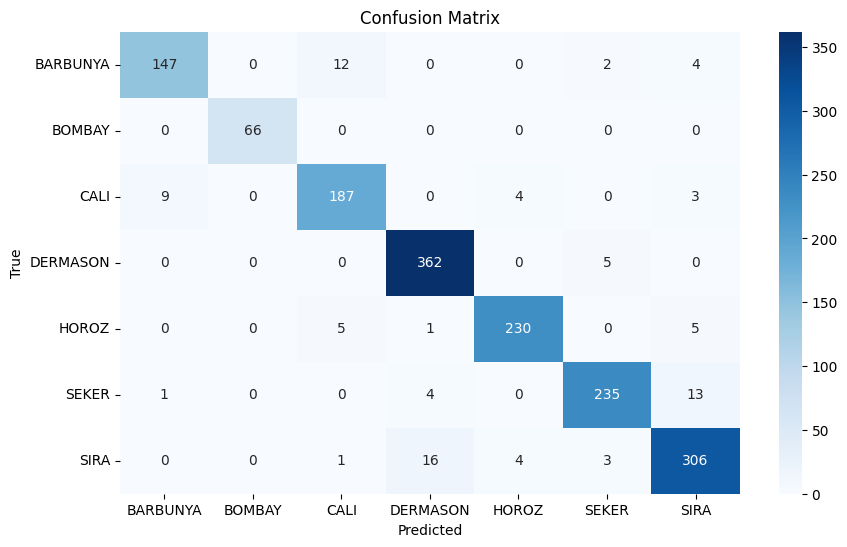

In [ ]:
# 混淆矩阵
#使用confusion_matrix函数计算目标数据（实际标签）和测试集预测标签之间的混淆矩阵。
cm = confusion_matrix(target_data, y_test_pred)

# 绘制混淆矩阵
plt.figure(figsize=(10, 6))
'''
#annot 参数设置为 True，表示在热图的每个单元格中显示混淆矩阵的数值，
# fmt 参数设置为 'd'，表示数值的格式为十进制整数（decimal），
#xticklabels 设置热图中 x 轴（即预测标签）上每个格子的标签。np.unique(y_train) 返回训练集 y_train 中的唯一类别标签，
用来设置预测类别的标签。这意味着 x 轴将标识模型的预测类别。
'''
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# 计算精确度、召回率和 F1 分数
accuracy = accuracy_score(target_data, y_test_pred)
precision = precision_score(target_data, y_test_pred, average='weighted')
recall = recall_score(target_data, y_test_pred, average='weighted')
f1 = f1_score(target_data, y_test_pred, average='weighted')

# 输出评估结果
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

'''
准确率（Accuracy）：0.9434，表示模型预测正确的比例为94.34%。
精确率（Precision）：0.9435，表示所有被预测为正类的样本中，实际为正类的比例为94.35%。
召回率（Recall）：0.9434，表示在实际为正类的样本中，被正确预测为正类的比例为94.34%。
F1分数（F1 Score）：0.9432，是精确率和召回率的调和平均数，用于综合评价模型的性能
'''


Accuracy: 0.9434
Precision: 0.9435
Recall: 0.9434
F1 Score: 0.9432
